# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, random_state=123, init='pca', learning_rate=200, early_exaggeration=12.)

In [3]:
X_tsne = tsne.fit_transform(X)
X_tsne

array([[ -3.797502 ,  56.915234 ],
       [ 27.331215 , -20.352457 ],
       [ 19.593912 ,  -9.1171665],
       ...,
       [ 10.712551 , -13.752444 ],
       [-19.705444 ,  29.436613 ],
       [  6.938061 ,  -9.728272 ]], dtype=float32)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from matplotlib import offsetbox

Computing t-SNE embedding


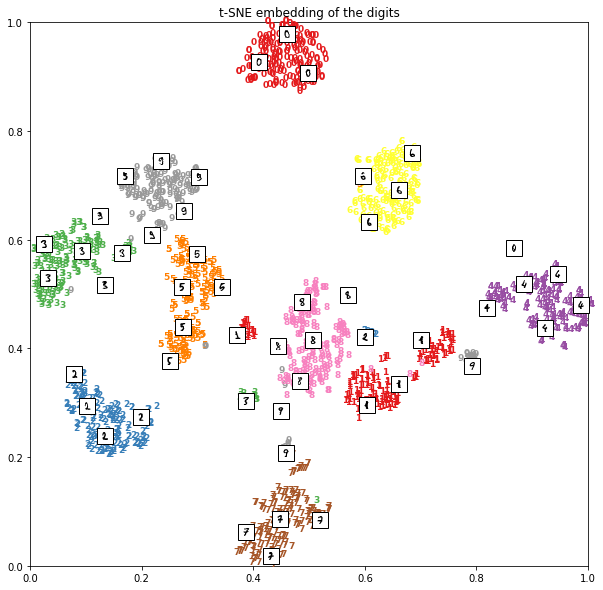

In [7]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i])
            ax.add_artist(imagebox)

    if title is not None:
        plt.title(title)

        
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "t-SNE embedding of the digits")
plt.show()